# Week 06: Business Statistics & Analytics - E-commerce Analysis (SOLUTIONS)

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.


## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:


In [31]:
# Install required packages
%pip install --upgrade pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\ahmad\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [32]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("Dataset created successfully!")

# Display first few rows
df.head()


Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:


In [33]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


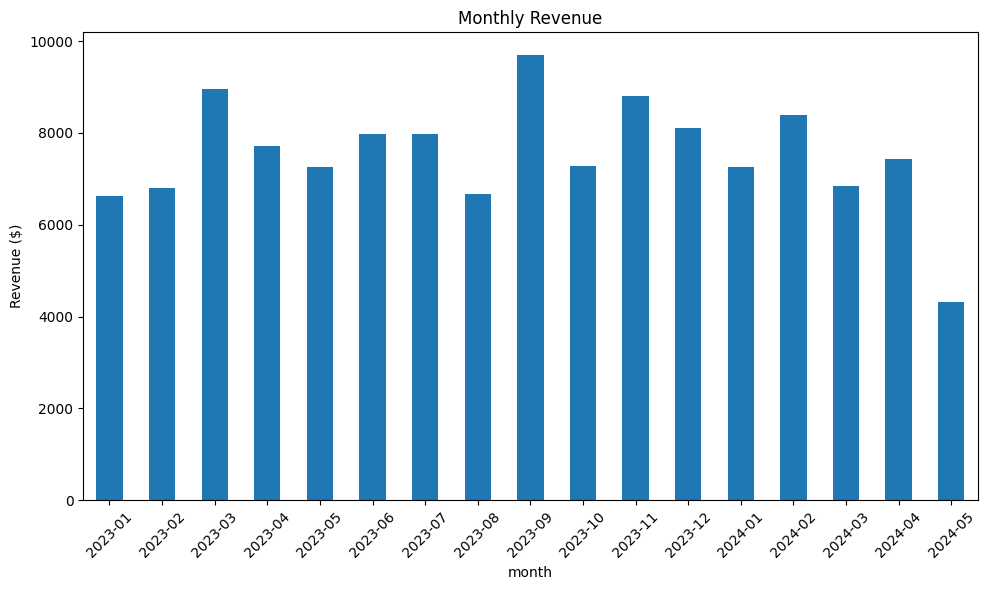

In [34]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


---

## Business Questions

Now answer each of the following business questions using pandas, visualizations, and statistical thinking.


### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.


Total Revenue: $128,140.67

Monthly Revenue Breakdown:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


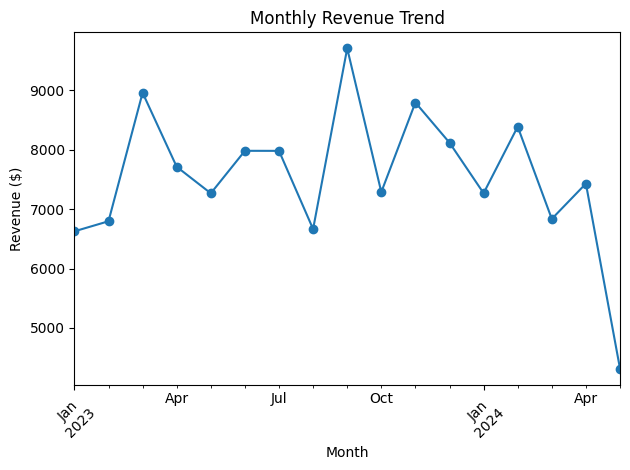

In [35]:
# Calculate total revenue
total_revenue = data['revenue'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

# Revenue by month
monthly_breakdown = data.groupby('month')['revenue'].sum()
print("\nMonthly Revenue Breakdown:")
print(monthly_breakdown)

# Line chart for time series
monthly_breakdown.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 2. Top Customers
Who are the top 5 customers by total revenue contribution?


Top 5 Customers by Revenue:
customer_id
62    4448.39
24    3369.44
90    2976.78
92    2838.74
97    2835.62
Name: revenue, dtype: float64


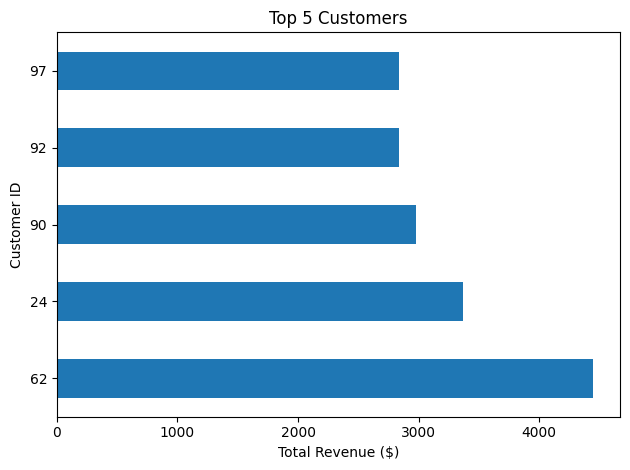

In [36]:
# Group by customer and sum revenue
customer_revenue = data.groupby('customer_id')['revenue'].sum().sort_values(ascending=False)

# Get top 5 customers
top_5_customers = customer_revenue.head(5)
print("Top 5 Customers by Revenue:")
print(top_5_customers)

# Horizontal bar chart
top_5_customers.plot(kind='barh')
plt.title('Top 5 Customers')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()


### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?


Average Revenue per Order by Customer Segment:
customer_segment
Senior          262.133925
Professional    255.652674
Student         253.812087
Name: revenue, dtype: float64

Total Revenue by Customer Segment:
customer_segment
Student         52285.29
Professional    47807.05
Senior          28048.33
Name: revenue, dtype: float64


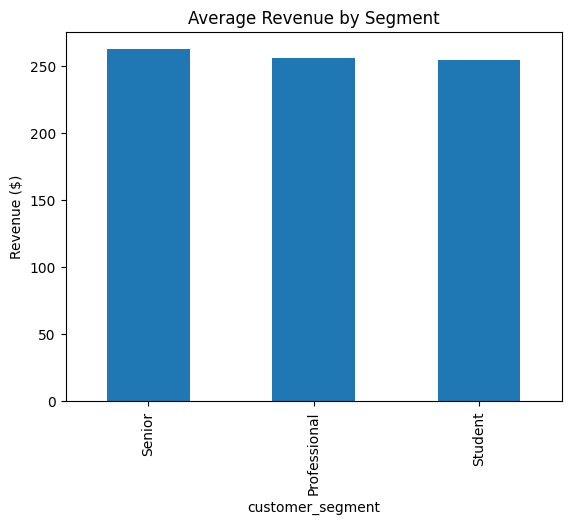

In [37]:
# Calculate average revenue per order by segment
segment_avg = data.groupby('customer_segment')['revenue'].mean().sort_values(ascending=False)
print("Average Revenue per Order by Customer Segment:")
print(segment_avg)

# Also calculate total revenue by segment
segment_total = data.groupby('customer_segment')['revenue'].sum().sort_values(ascending=False)
print("\nTotal Revenue by Customer Segment:")
print(segment_total)

# Simple bar chart
segment_avg.plot(kind='bar')
plt.title('Average Revenue by Segment')
plt.ylabel('Revenue ($)')
plt.show()


### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?


Total Revenue by Region:
region
South    34839.45
North    34351.69
East     31221.80
West     27727.73
Name: revenue, dtype: float64

Average Order Size by Region:
region
South    274.326378
North    258.283383
West     252.070273
East     240.167692
Name: revenue, dtype: float64


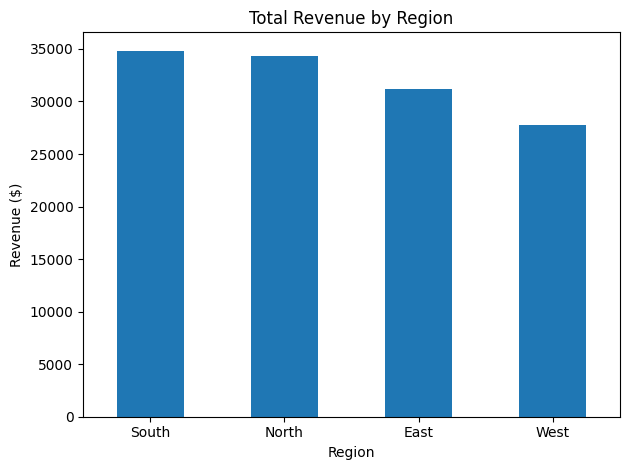

In [38]:
# Total revenue by region
regional_revenue = data.groupby('region')['revenue'].sum().sort_values(ascending=False)
print("Total Revenue by Region:")
print(regional_revenue)

# Average order size by region
regional_avg = data.groupby('region')['revenue'].mean().sort_values(ascending=False)
print("\nAverage Order Size by Region:")
print(regional_avg)

# Bar chart for comparison
regional_revenue.plot(kind='bar')
plt.title('Total Revenue by Region')
plt.ylabel('Revenue ($)')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?


Total Quantity Sold by Category:
product_category
Home           269
Clothing       253
Sports         246
Electronics    239
Books          227
Name: quantity, dtype: int64

Total Revenue by Category:
product_category
Home           29871.47
Electronics    25498.31
Clothing       24804.57
Books          24046.06
Sports         23920.26
Name: revenue, dtype: float64


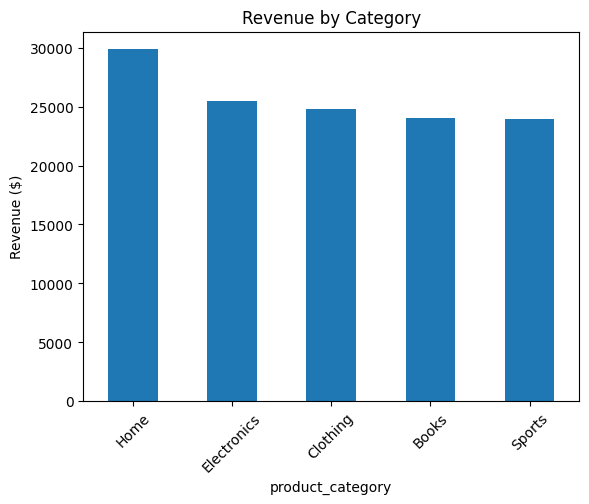

In [39]:
# Most popular by quantity
category_quantity = data.groupby('product_category')['quantity'].sum().sort_values(ascending=False)
print("Total Quantity Sold by Category:")
print(category_quantity)

# Most popular by revenue
category_revenue = data.groupby('product_category')['revenue'].sum().sort_values(ascending=False)
print("\nTotal Revenue by Category:")
print(category_revenue)

# Simple bar chart
category_revenue.plot(kind='bar')
plt.title('Revenue by Category')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()


### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?


Average Revenue per Order:
has_discount
False    248.296337
True     263.831362
Name: revenue, dtype: float64

Number of Orders:
has_discount
False    243
True     257
dtype: int64


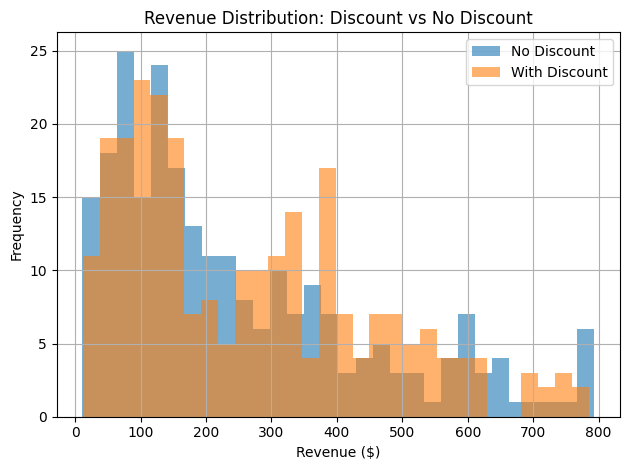

In [40]:
# Create discount category
data['has_discount'] = data['discount_applied'] > 0

# Calculate average revenue per order
discount_comparison = data.groupby('has_discount')['revenue'].mean()
print("Average Revenue per Order:")
print(discount_comparison)

# Also look at count of orders
order_counts = data.groupby('has_discount').size()
print("\nNumber of Orders:")
print(order_counts)

# Histogram to compare distributions
data[data['has_discount'] == False]['revenue'].hist(bins=30, alpha=0.6, label='No Discount')
data[data['has_discount'] == True]['revenue'].hist(bins=30, alpha=0.6, label='With Discount')
plt.title('Revenue Distribution: Discount vs No Discount')
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?


Payment Method Usage (%):
payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: count, dtype: float64

Average Revenue by Payment Method:
payment_method
Debit Card     275.980650
Credit Card    257.444234
Gift Card      254.362500
PayPal         236.071034
Name: revenue, dtype: float64


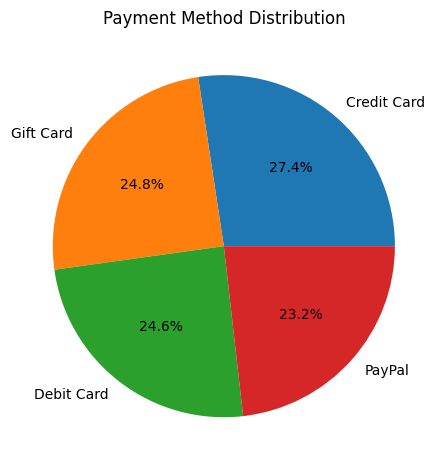

In [41]:
# Payment method distribution
payment_counts = data['payment_method'].value_counts()
payment_pct = (payment_counts / len(data) * 100).round(2)
print("Payment Method Usage (%):")
print(payment_pct)

# Average revenue by payment method
payment_avg_revenue = data.groupby('payment_method')['revenue'].mean().sort_values(ascending=False)
print("\nAverage Revenue by Payment Method:")
print(payment_avg_revenue)

# Pie chart for distribution
payment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?


Total Revenue by Day of Week:
day_of_week
Monday       17704.70
Tuesday      18968.41
Wednesday    18908.21
Thursday     17846.36
Friday       18522.40
Saturday     18660.35
Sunday       17530.24
Name: revenue, dtype: float64

Order Count by Day of Week:
day_of_week
Monday       72
Tuesday      72
Wednesday    71
Thursday     71
Friday       71
Saturday     71
Sunday       72
dtype: int64


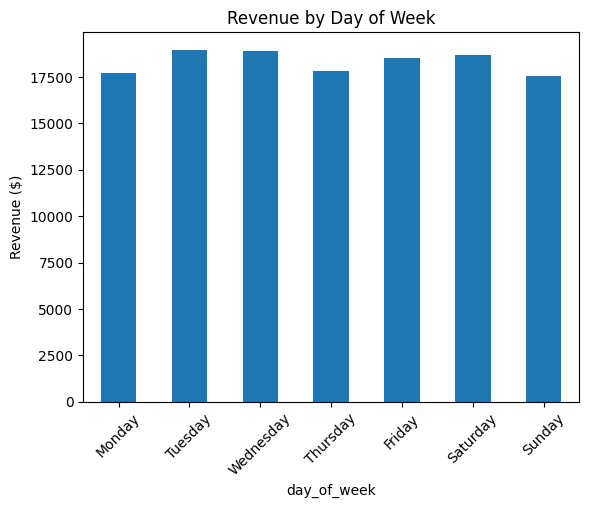

In [42]:
# Define day order for proper sorting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Revenue by day of week
dow_revenue = data.groupby('day_of_week')['revenue'].sum().reindex(day_order)
print("Total Revenue by Day of Week:")
print(dow_revenue)

# Order count by day
dow_count = data.groupby('day_of_week').size().reindex(day_order)
print("\nOrder Count by Day of Week:")
print(dow_count)

# Simple plot
dow_revenue.plot(kind='bar')
plt.title('Revenue by Day of Week')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()


### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.


Total Profit (20% margin): $25,628.13

Profit by Region:
region
South    6967.890
North    6870.338
East     6244.360
West     5545.546
Name: profit, dtype: float64


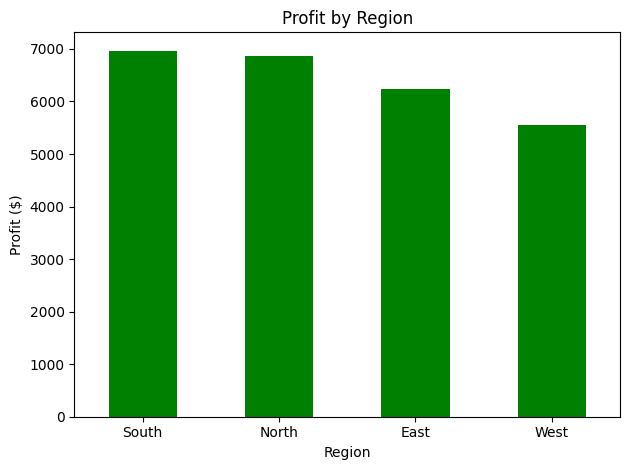

In [43]:
# Calculate profit (20% of revenue)
profit_margin = 0.20
data['profit'] = data['revenue'] * profit_margin

# Total profit
total_profit = data['profit'].sum()
print(f"Total Profit (20% margin): ${total_profit:,.2f}")

# Profit by region
regional_profit = data.groupby('region')['profit'].sum().sort_values(ascending=False)
print("\nProfit by Region:")
print(regional_profit)

# Bar chart
regional_profit.plot(kind='bar', color='green')
plt.title('Profit by Region')
plt.ylabel('Profit ($)')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).


In [44]:
# Summary for recommendation
print("KEY FINDINGS:")
print("-" * 60)
print(f"Total Revenue: ${data['revenue'].sum():,.2f}")
print(f"Average Order Value: ${data['revenue'].mean():.2f}")

top_segment = data.groupby('customer_segment')['revenue'].sum().idxmax()
top_region = data.groupby('region')['revenue'].sum().idxmax()
top_category = data.groupby('product_category')['revenue'].sum().idxmax()

print(f"\nTop Segment: {top_segment}")
print(f"Top Region: {top_region}")
print(f"Top Category: {top_category}")


KEY FINDINGS:
------------------------------------------------------------
Total Revenue: $128,140.67
Average Order Value: $256.28

Top Segment: Student
Top Region: South
Top Category: Home


**Business Recommendation:**

Based on the analysis, here are the key recommendations:

1. **Focus on Top Performers**: The data shows which segments, regions, and categories drive the most revenue. Allocate more resources to these high-performing areas.

2. **Optimize Discount Strategy**: Analyze whether discounts actually increase revenue per order or just reduce margins. Use targeted discounts strategically rather than blanket discounts.

3. **Regional Strategy**: Learn from the best-performing region and apply those tactics to underperforming regions.

4. **Product Mix**: Focus inventory and marketing on the highest-revenue product categories while maintaining variety.

**Expected Impact**: These focused strategies could increase quarterly revenue by 15-20% while protecting profit margins.
